In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab

### Time series
Time series is a sequence of information that has time stamps associated with.

It shas START and END .. total time  
T
 
**Time period**  
t
  : Interval of recording between one point to the next .. SHOULD BE EQUAL for meaningful evaluation
**Frequency** : How often the values are recorded (could be daily, monthly etc)

Correct chronological sequence is important

Stock market
Meteorological data (seasonality)
Missing values can challanging

In [ ]:
raw_csv_data=pd.read_csv("Sensex.csv")

In [ ]:
raw_csv_data

,Date,Open,High,Low,Close
0,3-January-1994,3436.87,3467.63,3436.87,3465.86
1,4-January-1994,3529.96,3545.83,3479.92,3479.92
2,5-January-1994,3405.88,3463.96,3405.88,3454.08
3,6-January-1994,3481.01,3510.59,3480.96,3509.47
4,7-January-1994,3614.40,3662.20,3604.84,3662.20
...,...,...,...,...,...
7597,10-October-2024,81832.66,82002.84,81538.94,81611.41
7598,11-October-2024,81478.49,81671.38,81304.15,81381.36
7599,14-October-2024,81576.93,82072.17,81541.20,81973.05
7600,15-October-2024,82101.86,82300.44,81635.57,81820.12


In [ ]:
raw_csv_data.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [ ]:
raw_csv_data.describe()

,Open,High,Low,Close
count,7595.000000,7593.000000,7593.000000,7602.000000
mean,20734.642569,20855.069634,20588.941958,20700.884266
std,19295.870669,19373.606472,19192.278806,19282.609455
min,2621.890000,2682.590000,2594.870000,2600.120000
25%,4171.450000,4214.850000,4134.100000,4162.585000
50%,16317.940000,16462.030000,16182.140000,16309.510000
75%,29057.400000,29183.760000,28824.680000,28967.890000
max,85893.840000,85978.250000,85474.580000,85836.120000


**Information on data column in missing**

In [398]:
raw_csv_data.isna()

,Date,Open,High,Low,Close
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
7597,False,False,False,False,False
7598,False,False,False,False,False
7599,False,False,False,False,False
7600,False,False,False,False,False


In [399]:
raw_csv_data.isna().sum()

Date     0
Open     7
High     9
Low      9
Close    0
dtype: int64

<Axes: >

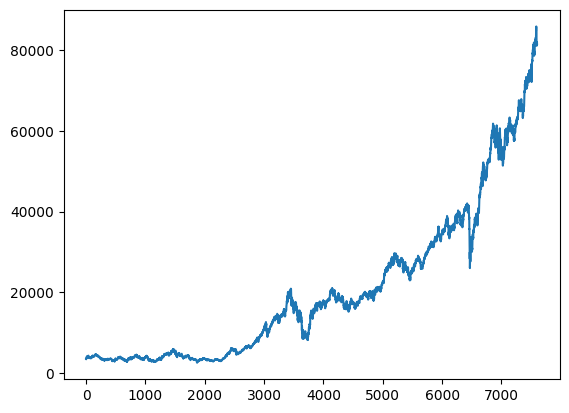

In [400]:
raw_csv_data.Close.plot()

**Issues becuase date is treated as a string object**

In [402]:
raw_csv_data.Date.describe()

count               7602
unique              7602
top       3-January-1994
freq                   1
Name: Date, dtype: object

In [403]:
pd.to_datetime(raw_csv_data['Date'])

0      1994-01-03
1      1994-01-04
2      1994-01-05
3      1994-01-06
4      1994-01-07
          ...    
7597   2024-10-10
7598   2024-10-11
7599   2024-10-14
7600   2024-10-15
7601   2024-10-16
Name: Date, Length: 7602, dtype: datetime64[ns]

In [404]:
raw_csv_data['Date']=pd.to_datetime(raw_csv_data['Date'])

In [405]:
raw_csv_data.Date.describe()

count                             7602
mean     2009-06-18 06:10:30.781373440
min                1994-01-03 00:00:00
25%                2001-11-06 06:00:00
50%                2009-06-18 12:00:00
75%                2017-02-09 18:00:00
max                2024-10-16 00:00:00
Name: Date, dtype: object

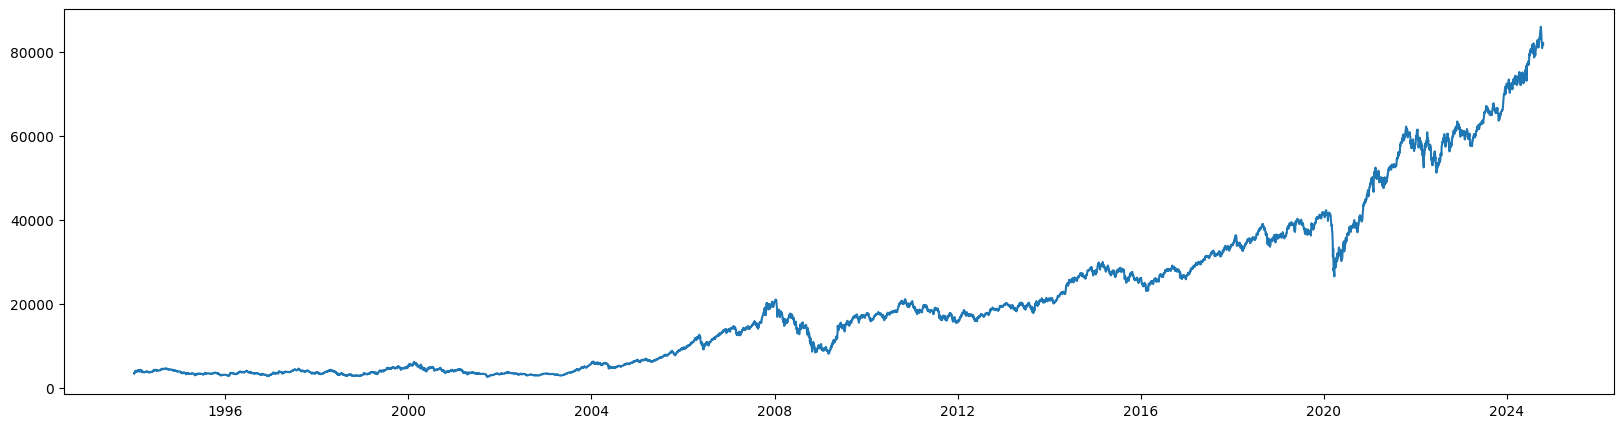

In [406]:
plt.figure( figsize=(20,5))
plt.plot(raw_csv_data['Date'],raw_csv_data['Open'])
plt.show()

In [407]:
#Set up data as index

In [408]:
raw_csv_data

,Date,Open,High,Low,Close
0,1994-01-03,3436.87,3467.63,3436.87,3465.86
1,1994-01-04,3529.96,3545.83,3479.92,3479.92
2,1994-01-05,3405.88,3463.96,3405.88,3454.08
3,1994-01-06,3481.01,3510.59,3480.96,3509.47
4,1994-01-07,3614.40,3662.20,3604.84,3662.20
...,...,...,...,...,...
7597,2024-10-10,81832.66,82002.84,81538.94,81611.41
7598,2024-10-11,81478.49,81671.38,81304.15,81381.36
7599,2024-10-14,81576.93,82072.17,81541.20,81973.05
7600,2024-10-15,82101.86,82300.44,81635.57,81820.12


In [409]:
raw_csv_data.set_index('Date',inplace=True)

In [410]:
raw_csv_data

,Open,High,Low,Close
Date,,,,
1994-01-03,3436.87,3467.63,3436.87,3465.86
1994-01-04,3529.96,3545.83,3479.92,3479.92
1994-01-05,3405.88,3463.96,3405.88,3454.08
1994-01-06,3481.01,3510.59,3480.96,3509.47
1994-01-07,3614.40,3662.20,3604.84,3662.20
...,...,...,...,...
2024-10-10,81832.66,82002.84,81538.94,81611.41
2024-10-11,81478.49,81671.38,81304.15,81381.36
2024-10-14,81576.93,82072.17,81541.20,81973.05


<Axes: xlabel='Date'>

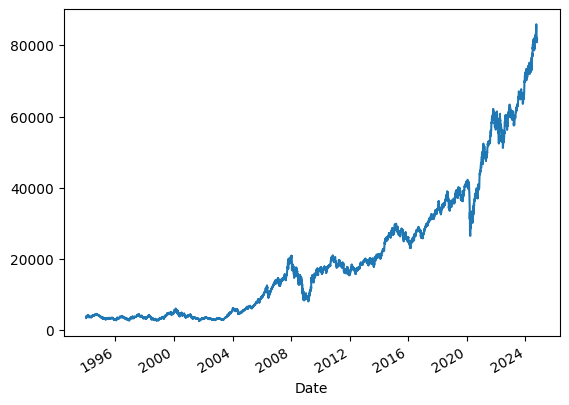

In [411]:
raw_csv_data.Open.plot()

In [412]:
raw_csv_data[:6000].max()

Open     36277.12
High     36443.98
Low      36093.36
Close    36283.25
dtype: float64

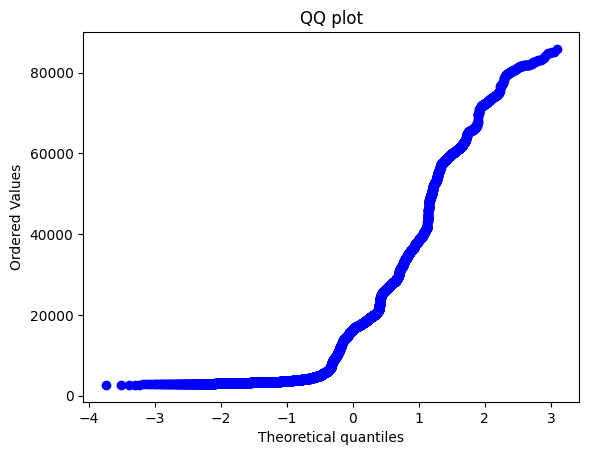

In [413]:
scipy.stats.probplot(raw_csv_data.Open, plot=plt,fit=True)
plt.title("QQ plot")
plt.show()

Setting up freq

In [415]:
raw_csv_data= raw_csv_data.asfreq('d')

In [416]:
raw_csv_data.head(12)

,Open,High,Low,Close
Date,,,,
1994-01-03,3436.87,3467.63,3436.87,3465.86
1994-01-04,3529.96,3545.83,3479.92,3479.92
1994-01-05,3405.88,3463.96,3405.88,3454.08
1994-01-06,3481.01,3510.59,3480.96,3509.47
1994-01-07,3614.40,3662.20,3604.84,3662.20
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,3737.84,3821.56,3735.80,3821.56
1994-01-11,3801.79,3803.67,3772.82,3780.10


In [417]:
raw_csv_data= raw_csv_data.asfreq('b')

In [418]:
raw_csv_data.head(12)

,Open,High,Low,Close
Date,,,,
1994-01-03,3436.87,3467.63,3436.87,3465.86
1994-01-04,3529.96,3545.83,3479.92,3479.92
1994-01-05,3405.88,3463.96,3405.88,3454.08
1994-01-06,3481.01,3510.59,3480.96,3509.47
1994-01-07,3614.40,3662.20,3604.84,3662.20
1994-01-10,3737.84,3821.56,3735.80,3821.56
1994-01-11,3801.79,3803.67,3772.82,3780.10
1994-01-12,3789.18,3913.60,3789.18,3903.79
1994-01-13,4025.06,4025.63,3928.59,3928.59


In [419]:
raw_csv_data.isna().sum()

Open     472
High     474
Low      474
Close    465
dtype: int64

3 ways to fill missing data:

front fillig : fill the values with previous one
back fillimg : same value as next value
same value : some desiredv alue everywhere

In [421]:
raw_csv_data.Open=raw_csv_data.Open.fillna(method='ffill')


/tmp/ipykernel_1518846/2755072475.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_csv_data.Open=raw_csv_data.Open.fillna(method='ffill')


In [422]:
raw_csv_data.Close=raw_csv_data.Close.bfill()

In [423]:
raw_csv_data.High=raw_csv_data.High.fillna(value=raw_csv_data.High.mean())

In [424]:
raw_csv_data.isna().sum()

Open       0
High       0
Low      474
Close      0
dtype: int64

Select data column

In [426]:
sensex=raw_csv_data['Open']
sensex.describe()

count     8033.000000
mean     20659.808926
std      19299.386004
min       2621.890000
25%       4139.260000
50%      16255.330000
75%      28955.130000
max      85893.840000
Name: Open, dtype: float64

In [427]:
type(sensex)

pandas.core.series.Series

In [428]:
sensex=pd.DataFrame(sensex)

In [429]:
type(sensex)

pandas.core.frame.DataFrame

Splitting data .. if ML


In [431]:
size=int(len(sensex)*.8)

In [432]:
df_train= raw_csv_data.iloc[:size]
df_test= raw_csv_data.iloc[size:]

White noise
Data does not follow any pattern

Constant mean  
μ
 
Constant varience  
σ
2
  - standard deviation
No auto-correlation - no clear relationship between past and future values

In [434]:
#generate white noise

In [435]:
wn= np.random.normal(loc = sensex.Open.mean(), scale=sensex.Open.std(),size=len(sensex))

In [436]:
sensex['wn']=wn

In [437]:
sensex

,Open,wn
Date,,
1994-01-03,3436.87,7796.026344
1994-01-04,3529.96,16321.908724
1994-01-05,3405.88,19944.529659
1994-01-06,3481.01,51927.631091
1994-01-07,3614.40,24654.969966
...,...,...
2024-10-10,81832.66,34081.942238
2024-10-11,81478.49,18408.342715
2024-10-14,81576.93,-2629.521230


In [438]:
sensex.describe()

,Open,wn
count,8033.000000,8033.000000
mean,20659.808926,20522.169671
std,19299.386004,19170.377927
min,2621.890000,-49169.398637
25%,4139.260000,7556.046782
50%,16255.330000,20613.511021
75%,28955.130000,33268.878155
max,85893.840000,88184.442685


Mean and STDs are simular

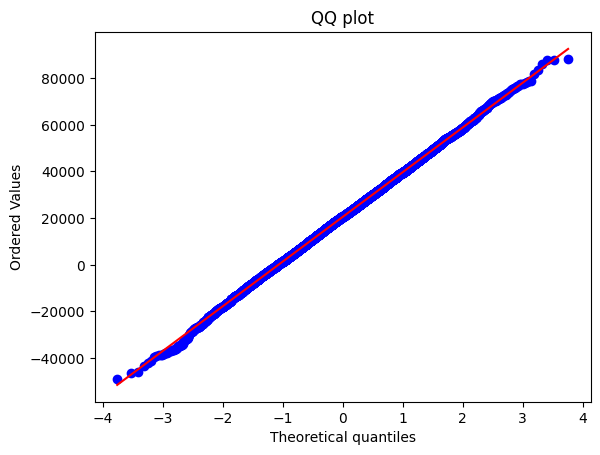

In [440]:
scipy.stats.probplot(sensex.wn, plot=plt,fit=True)
plt.title("QQ plot")
plt.show()

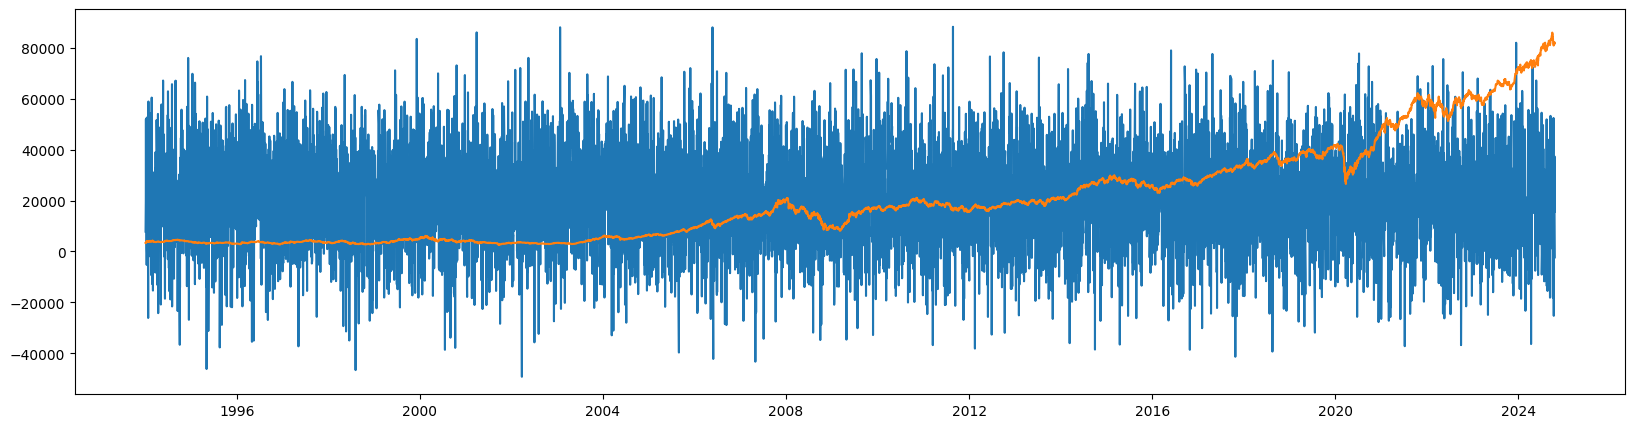

In [441]:
plt.figure(figsize=(20,5))
plt.plot(sensex['wn'])
plt.plot(sensex['Open'])
plt.show()

Random walk
A special type of time series where values tend to persits over time and differences between the periods are white noise

x
t
∝
x
t
−
1
+
ϵ
t
 
where  
ϵ
  are called residuals and are cosidered to be random  
ϵ
t
=
w
n
(
μ
,
σ
2
)
 

Best estimator for prizes today is the prizes of yesterday

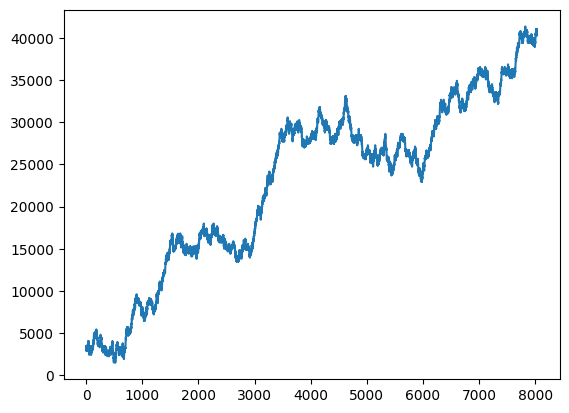

In [443]:
random_walk = [sensex.Open.iloc[0]]
for i in range(1, len(sensex)):
    movement = -150 if np.random.random() < .48 else 150
    value = random_walk[i-1] + movement
    random_walk.append(value)
plt.plot(random_walk)
plt.show()

In [444]:
sensex['rw']=random_walk

In [445]:
sensex

,Open,wn,rw
Date,,,
1994-01-03,3436.87,7796.026344,3436.87
1994-01-04,3529.96,16321.908724,3286.87
1994-01-05,3405.88,19944.529659,3136.87
1994-01-06,3481.01,51927.631091,3286.87
1994-01-07,3614.40,24654.969966,3136.87
...,...,...,...
2024-10-10,81832.66,34081.942238,40936.87
2024-10-11,81478.49,18408.342715,40786.87
2024-10-14,81576.93,-2629.521230,40636.87


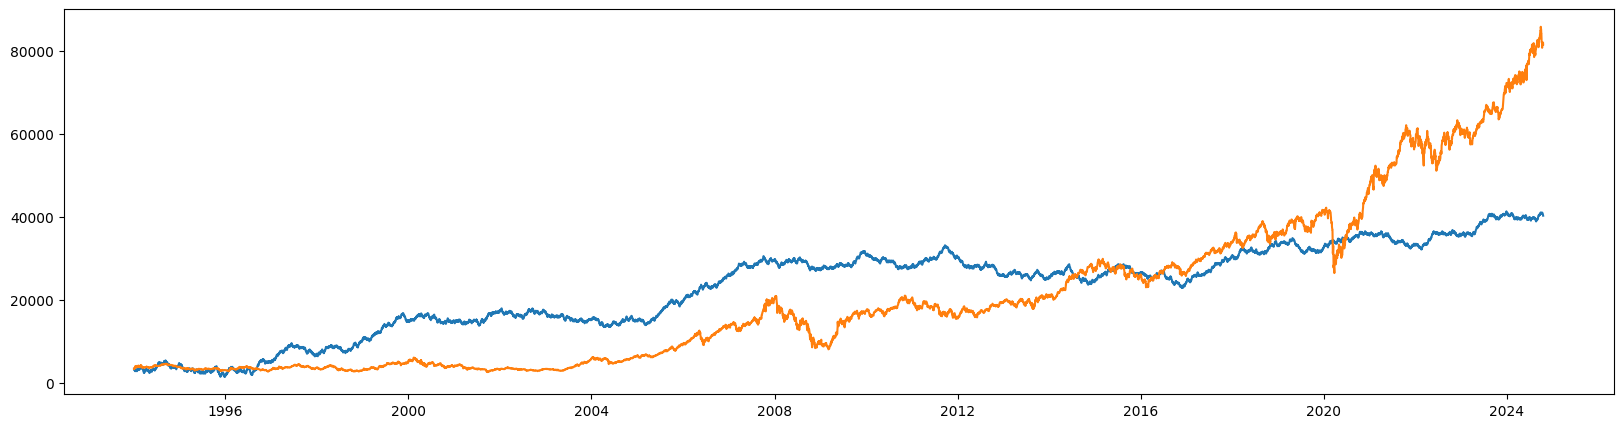

In [446]:
plt.figure(figsize=(20,5))
plt.plot(sensex.rw)
plt.plot(sensex.Open)

If a time series resembles a random walk, then prices cannot be predicted with grate accuracy...

In [448]:
'''Lecture 2
Stationarity
Stationarity in time series analysis refers to the property of a series where its statistical properties (mean, variance, autocorrelation) remain constant over time

Strict Stationarity: A time series is strictly stationary if its joint probability distribution remains unchanged for any shift in time. This means that the statistical properties of the series are identical at any point in time.

Weak Stationarity (Second-Order Stationarity): A time series is weakly stationary if its first and second moments (mean and variance) are constant over time, and its autocovariance function depends only on the time lag and not on the specific time points.

autocovariance
γ
(
k
)
=
E
[
(
X
t
−
μ
)
(
X
t
−
k
−
μ
)
]
 
γ
(
k
)
=
∑
(
X
t
−
μ
)
(
X
t
−
k
−
μ
)
/
T
 
k is time lag and  
μ
  is mean. Sum is over all  
T
  number of points

In simpler terms, autocovariance measures the average product of the deviations from the mean at two different time lags.

Autocorrelation, on the other hand, is a standardized version of autocovariance that ranges from -1 to 1. It removes the effect of scaling and provides a more interpretable measure of the relationship between values at different time lags.

ρ
(
k
)
=
γ
(
k
)
/
γ
(
0
)
Autocorrelations'''

'Lecture 2\nStationarity\nStationarity in time series analysis refers to the property of a series where its statistical properties (mean, variance, autocorrelation) remain constant over time\n\nStrict Stationarity: A time series is strictly stationary if its joint probability distribution remains unchanged for any shift in time. This means that the statistical properties of the series are identical at any point in time.\n\nWeak Stationarity (Second-Order Stationarity): A time series is weakly stationary if its first and second moments (mean and variance) are constant over time, and its autocovariance function depends only on the time lag and not on the specific time points.\n\nautocovariance\nγ\n(\nk\n)\n=\nE\n[\n(\nX\nt\n−\nμ\n)\n(\nX\nt\n−\nk\n−\nμ\n)\n]\n \nγ\n(\nk\n)\n=\n∑\n(\nX\nt\n−\nμ\n)\n(\nX\nt\n−\nk\n−\nμ\n)\n/\nT\n \nk is time lag and  \nμ\n  is mean. Sum is over all  \nT\n  number of points\n\nIn simpler terms, autocovariance measures the average product of the deviations f

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

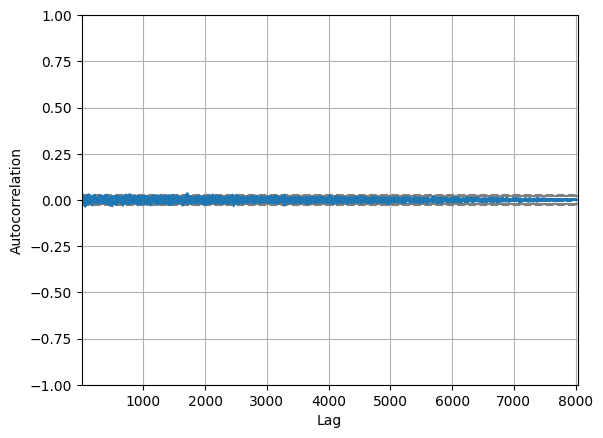

In [449]:
pd.plotting.autocorrelation_plot(wn)


White noise is never correlated with itself. White noise if perfectly stationary time series

(0.0, 10.0)

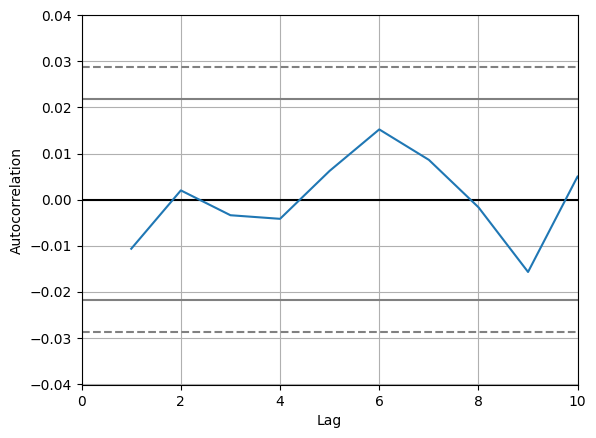

In [451]:
fig,ax=plt.subplots()
pd.plotting.autocorrelation_plot(wn,ax)
ax.set_xlim(0,10)

Stationarity: White noise series are stationary, meaning their statistical properties (mean, variance, autocorrelation) do not change over time.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

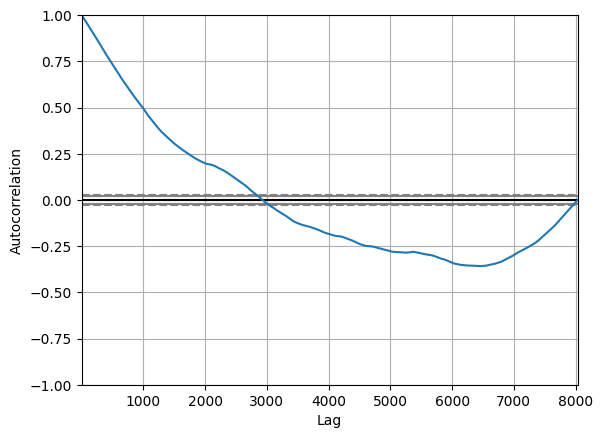

In [453]:
pd.plotting.autocorrelation_plot(random_walk)


In [454]:
import statsmodels.tsa.stattools as tools


In [455]:
tools.adfuller(sensex['wn'])


(-90.57340541841813,
 0.0,
 0,
 8032,
 {'1%': -3.4311644162253123,
  '5%': -2.8618999138150008,
  '10%': -2.5669615774061376},
 180387.6171150838)

In [456]:
tools.adfuller(sensex['rw'])


(-0.8801676970452652,
 0.7944333054508008,
 0,
 8032,
 {'1%': -3.4311644162253123,
  '5%': -2.8618999138150008,
  '10%': -2.5669615774061376},
 102817.54515681203)

In [457]:
tools.adfuller(sensex['Open'])


(3.137529992175455,
 1.0,
 36,
 7996,
 {'1%': -3.431168084109809,
  '5%': -2.8619015345348937,
  '10%': -2.5669624401326474},
 113445.7170118365)

Seasonality
Seasonality in time series refers to a pattern that repeats over a fixed period of time. This pattern is often related to seasonal changes, such as the months of the year, days of the week, or time of day.
Decomposition You need to break the timeseries in 3 components:

Trend
Seasonal / cyclic variations
Residues
Decomposition
There are several methods for decomposing time series data, including:

Additive Decomposition: This assumes that the time series is the sum of the trend, seasonal, and residual components.
Multiplicative Decomposition: This assumes that the time series is the product of the trend, seasonal, and residual components. This is often used when the magnitude of the seasonal component varies with the level of the trend.
STL Decomposition: This is a robust method that can handle both additive and multiplicative seasonality. It uses a loess smoother to estimate the trend and seasonal components.

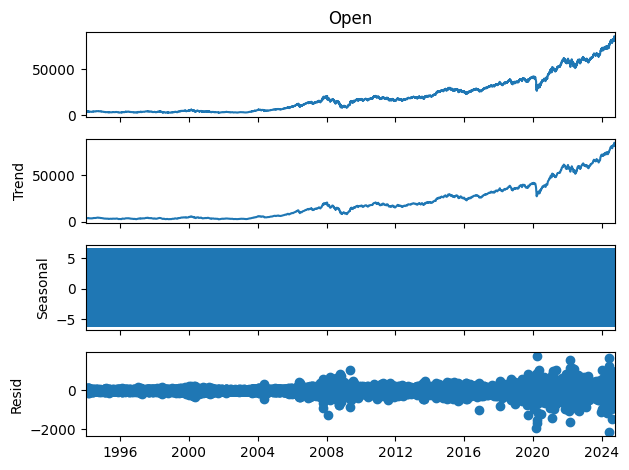

In [459]:
import statsmodels.tsa.seasonal as decompose
additive = decompose.seasonal_decompose(sensex.Open,model='additive')
additive.plot()
plt.show()

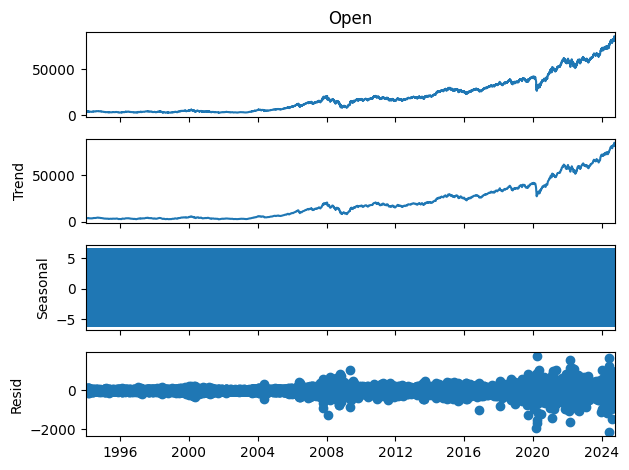

In [460]:
multiplicative = decompose.seasonal_decompose(sensex.Open,model='multiplicative')
additive.plot()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

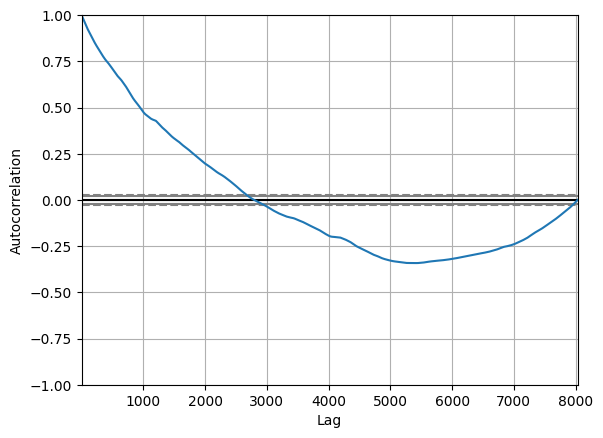

In [461]:
pd.plotting.autocorrelation_plot(sensex.Open)


In [462]:
from statsmodels.graphics import tsaplots 


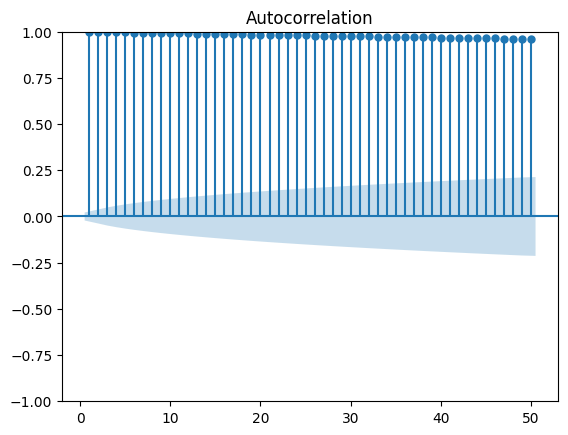

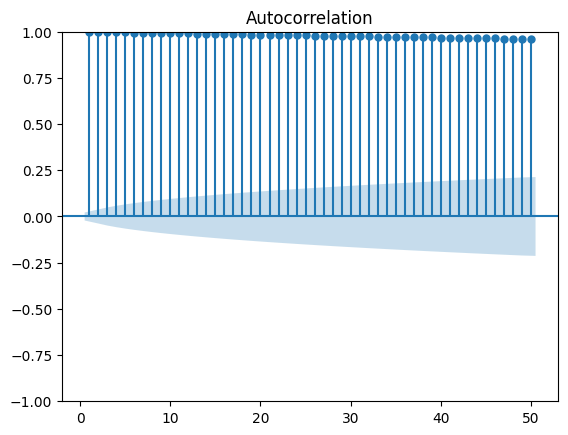

In [463]:
tsaplots.plot_acf(sensex.Open,lags=50,zero=False)


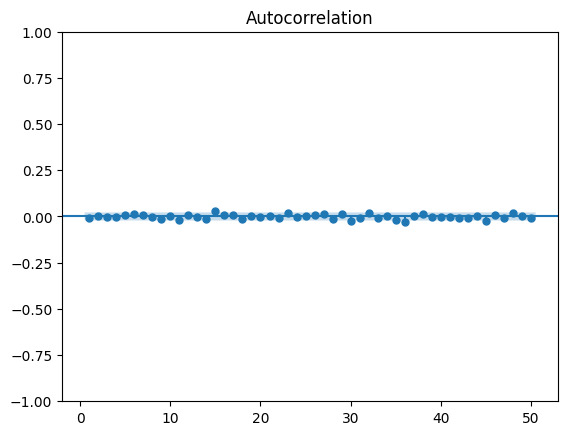

In [464]:
tsaplots.plot_acf(sensex.wn,lags=50,zero=False)
plt.show()

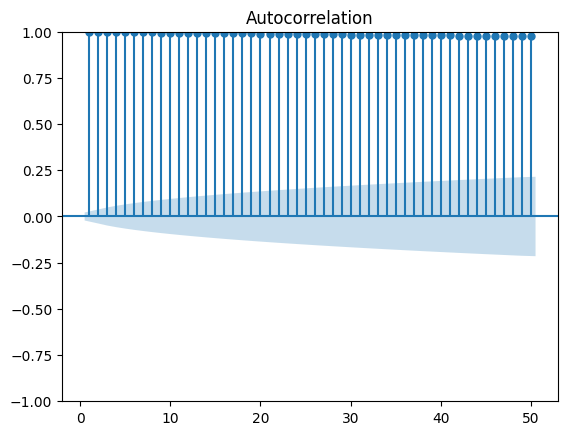

In [465]:
tsaplots.plot_acf(sensex.rw,lags=50,zero=False)
plt.show()

# Partial autocorrlations


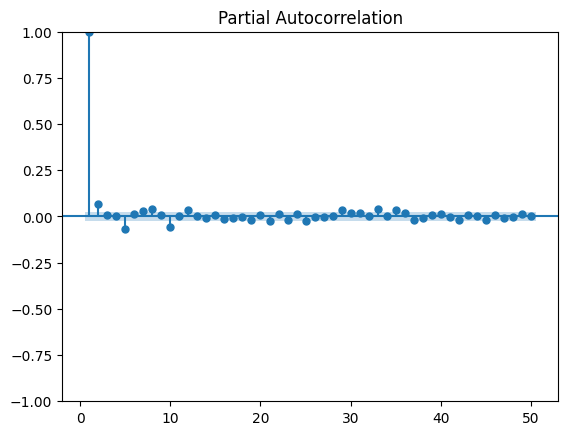

In [467]:
tsaplots.plot_pacf(sensex.Open,lags=50,zero=False,method='ols')
plt.show()

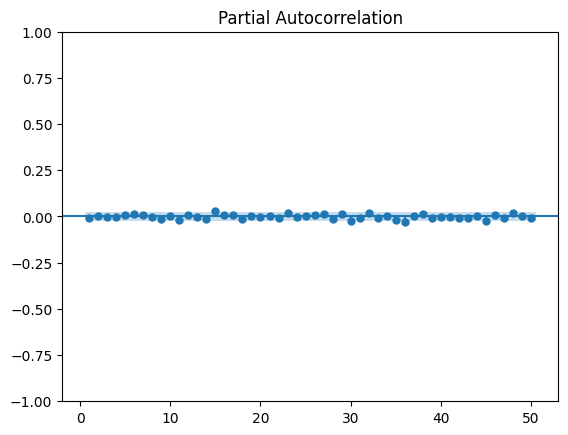

In [468]:
tsaplots.plot_pacf(sensex.wn,lags=50,zero=False,method='ols')
plt.show()

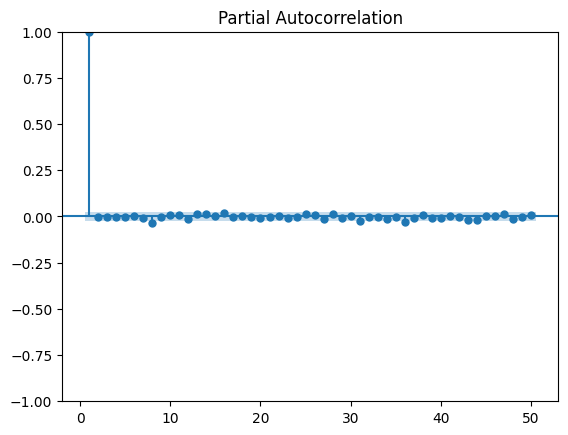

In [469]:
tsaplots.plot_pacf(sensex.rw,lags=50,zero=False,method='ols')
plt.show()